<a href="https://colab.research.google.com/github/arjyel/Music-Composition-AIML/blob/main/MusicCompositionLSTM_Music21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Music Generation with LSTM and Music21**

**Description**:
This project demonstrates the use of a Long Short-Term Memory (LSTM) neural network to generate musical sequences based on a dataset of MIDI files. The LSTM model is trained on a collection of MIDI files containing musical notes and chords. After training, the model is used to generate a new musical sequence, which is then translated into a MIDI file. The generated MIDI file is further processed using the Music21 library to create a visual representation of the musical notation. The project includes code for data preprocessing, model training, music generation, MIDI file creation, and musical notation visualization.

In [5]:
import glob
from music21 import converter, instrument, note, chord

# Create an empty list to store the notes
notes = []

# I have selected only 2 and MIDI files in the specified directory and done iteration through them as the execution time is too high
for file in glob.glob("/content/drive/MyDrive/MachineLearningDataSets/midi_songs/*.mid"):
    # Parse the MIDI file
    midi = converter.parse(file)
    notes_to_parse = None
    print(type(file))
    # Check if the MIDI file has instrument parts
    parts = instrument.partitionByInstrument(midi)
    #print(parts)
    if parts:
        # Choose the first instrument part
        notes_to_parse = parts.parts[0].recurse()
        #print(notes_to_parse)
    else:
        # If the file doesn't have instrument parts, use flat structure
        notes_to_parse = midi.flat.notes
        #print(notes_to_parse)

    # Iteration through the elements (notes and chords) in the parsed MIDI file
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            # For individual notes, append the pitch to the notes list
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            # For chords, append the chord as a dot-separated string of note names
            notes.append('.'.join(str(n) for n in element.normalOrder))

# Now you have the extracted notes and chords stored in the 'notes' list
# You can continue processing this list as needed for your application


<class 'str'>
<class 'str'>


In [6]:
print(notes)

['C5', 'C6', 'C5', 'G4', 'G5', 'G4', 'B-4', 'B-5', 'B-4', 'F4', 'F5', 'F4', 'G#4', 'G#5', 'G#4', 'E-4', 'E-5', 'E-4', 'G4', 'G5', 'G4', 'D4', 'D5', 'D4', '0.3.7', '10.2', '8.0', '3.7.10', '5.8', '3.7', '2.5.7.10', 'G1', '2.5.7.10', 'G1', '5', '7', '10', '7', '10', '3', '2', '10', '5', '3', '5', '7', '5', '0', '3', '2', '3', '7', '5', '7', '10', 'C5', 'C4', 'E-4', 'G4', 'B-3', 'D4', 'G4', 'G#3', 'C4', 'G4', 'B-3', 'D4', 'G4', 'C4', 'E-4', 'G4', 'B-3', 'D4', 'G4', 'G#3', 'C4', 'G4', 'B-3', 'D4', 'G4', 'E-5', 'C4', 'E-4', 'G4', 'D5', 'B-3', 'D4', 'G4', '8.0', '0.3', '5.7', '7.10', '2', '2.7', 'E-5', 'C4', 'E-4', '3.7', '10.2', '2.3', '2.7', '8.0', '0.3', '5.7', '7.11', 'G3', 'D4', 'G4', 'E-5', 'C4', 'E-4', '3.7', 'D5', 'B-3', 'D4', '2.7', '8.0', '0.2', '3.7', '5.9', '7.0', '7.9', '7.10', 'E-3', 'B-3', '10.3', '5.9.0', '7.0', '3.5', 'G5', 'G3', 'D4', 'G4', 'D5', 'B4', 'G4', 'E-5', 'C4', 'E-4', 'G4', 'D5', 'B-3', 'D4', 'G4', '8.0', '0.3', '5.7', '7.10', '2', '2.7', 'E-5', 'C4', 'E-4', '3.7'

In [7]:

# Specify the path to the directory containing the MIDI files
midi_files_path = "/content/drive/MyDrive/MachineLearningDataSets/midi_songs/*.mid"

# Get a list of all MIDI files in the specified directory
midi_files = glob.glob(midi_files_path)
count_file_num = 0
# Iterate through the MIDI files and print some basic information
for file in midi_files:
    count_file_num += 1
    print("File:", file)
    # Parse the MIDI file
    midi = converter.parse(file)

    # Print the number of parts (instrument tracks) in the MIDI file
    print("Number of Parts:", len(midi.parts))

    # Print the duration of the MIDI file in quarter lengths
    print("Duration (in quarter lengths):", midi.highestTime)

    # Print the number of notes and chords in the MIDI file
    num_notes = len([element for element in midi.flat.notesAndRests if element.isNote])
    num_chords = len([element for element in midi.flat.notesAndRests if element.isChord])
    print("Number of Notes:", num_notes)
    print("Number of Chords:", num_chords)

    print("-" * 50)


File: /content/drive/MyDrive/MachineLearningDataSets/midi_songs/Eternal_Harvest.mid
Number of Parts: 1
Duration (in quarter lengths): 508.5
Number of Notes: 642
Number of Chords: 459
--------------------------------------------------
File: /content/drive/MyDrive/MachineLearningDataSets/midi_songs/Ff7-One_Winged.mid


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Number of Parts: 2
Duration (in quarter lengths): 491.5
Number of Notes: 844
Number of Chords: 358
--------------------------------------------------


In [8]:
print('The Total Number of files are:',count_file_num)

The Total Number of files are: 2


In [9]:
#in this block I have created a mapping function to map from string-based categorical data to integer-based numerical data
#because neural network will perform better on numerical data

import numpy
from keras.utils import to_categorical

pitchnames = sorted(set(item for item in notes))
sequence_length = 100
n_vocab = len(pitchnames)
# get all pitch names

# creation of a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]
    network_input.append([note_to_int[char] for char in sequence_in])
    #print(network_input)
    network_output.append(note_to_int[sequence_out])
    #print(network_output)
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input
network_input = network_input / float(n_vocab)
network_output = to_categorical(network_output)

In [10]:
import numpy as np
from keras.models import Sequential  # Import the Sequential class
from keras.layers import LSTM, Dropout, Dense, Activation
# Building the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(network_input.shape[1], network_input.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256))
model.add(Dense(n_vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [11]:
# Train the model
#I am using epochs = 20 (not more than that) otherwise the execution time will be really high for the given large datasets
model.fit(network_input, network_output, epochs=20, batch_size=64)

Epoch 1/20
35/35 [==============================] - 73s 2s/step - loss: 4.7174
Epoch 2/20
35/35 [==============================] - 67s 2s/step - loss: 4.5843
Epoch 3/20
35/35 [==============================] - 67s 2s/step - loss: 4.5780
Epoch 4/20
35/35 [==============================] - 75s 2s/step - loss: 4.5705
Epoch 5/20
35/35 [==============================] - 67s 2s/step - loss: 4.5679
Epoch 6/20
35/35 [==============================] - 68s 2s/step - loss: 4.5656
Epoch 7/20
35/35 [==============================] - 68s 2s/step - loss: 4.5669
Epoch 8/20
35/35 [==============================] - 66s 2s/step - loss: 4.5625
Epoch 9/20
35/35 [==============================] - 69s 2s/step - loss: 4.5591
Epoch 10/20
35/35 [==============================] - 66s 2s/step - loss: 4.5618
Epoch 11/20
35/35 [==============================] - 66s 2s/step - loss: 4.5599
Epoch 12/20
35/35 [==============================] - 66s 2s/step - loss: 4.5610
Epoch 13/20
35/35 [==============================

In [12]:
import numpy as np

# Choose a random starting point
start = np.random.randint(0, len(network_input)-1)
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
pattern = network_input[start]

# Generation of 500 notes whose length can be adjusted  as needed
prediction_output = []
for _ in range(500):
    prediction_input = np.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input / float(n_vocab)
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    result = int_to_note[index]
    prediction_output.append(result)

    #pattern array is updated using numpy.roll() to maintain the sequence length because it showed the error of sequence length mismatched
    pattern = np.roll(pattern, -1)
    pattern[-1] = index

# Now prediction_output contains the generated music sequence

In [13]:
# desirable_num_to_display = 50
# for i, item in enumerate(prediction_output):
#      if i >= desirable_num_to_display:
#          break
#      print(item)

In [14]:
# Create a MIDI file from the generated notes
offset = 0
output_notes = []

In [15]:
# create note and chord objects based on the values generated by the model
for pattern in prediction_output:
    #when pattern is a chord
    #This condition checks if the current pattern is a chord. A chord pattern is expected to contain dots or be a sequence of digits
    if ('.' in pattern) or pattern.isdigit():
      #when the pattern is a chord (as we know chord is a combination of notes)
      # it splits the pattern into individual note values based on the dot delimiter.
        notes_in_chord = pattern.split('.')
        notes = []
        #This loop iterates over each note in the chord withour missing any note
        #creates a note.Note object for each note value, assigns a piano instrument to the note, and adds the note to the notes list.
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        #After processing and extracting all the notes in the chord, creation of a chord.Chord object is done using the notes from the notes list,
         #sets the offset for the chord, and adds the chord to the output_notes list.
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    #when pattern is a note
    #If the pattern is not a chord (i.e., a single note),
    # it creates a note.Note object for the note value, sets the offset, assigns a piano instrument,
    # and adds the note to the output_notes list.
    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    # increament of offset by 0.5 on each iteration so that notes or chords do not overlap in time.
    offset += 0.5

In [16]:
print(output_notes)

[<music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.note.Note D>, <music21.n

In [17]:
#creation of the MIDI file which contain the music generated by the network
from music21 import stream
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='generated_music_output.mid')

'generated_music_output.mid'

In [18]:
#!apt install -q musescore

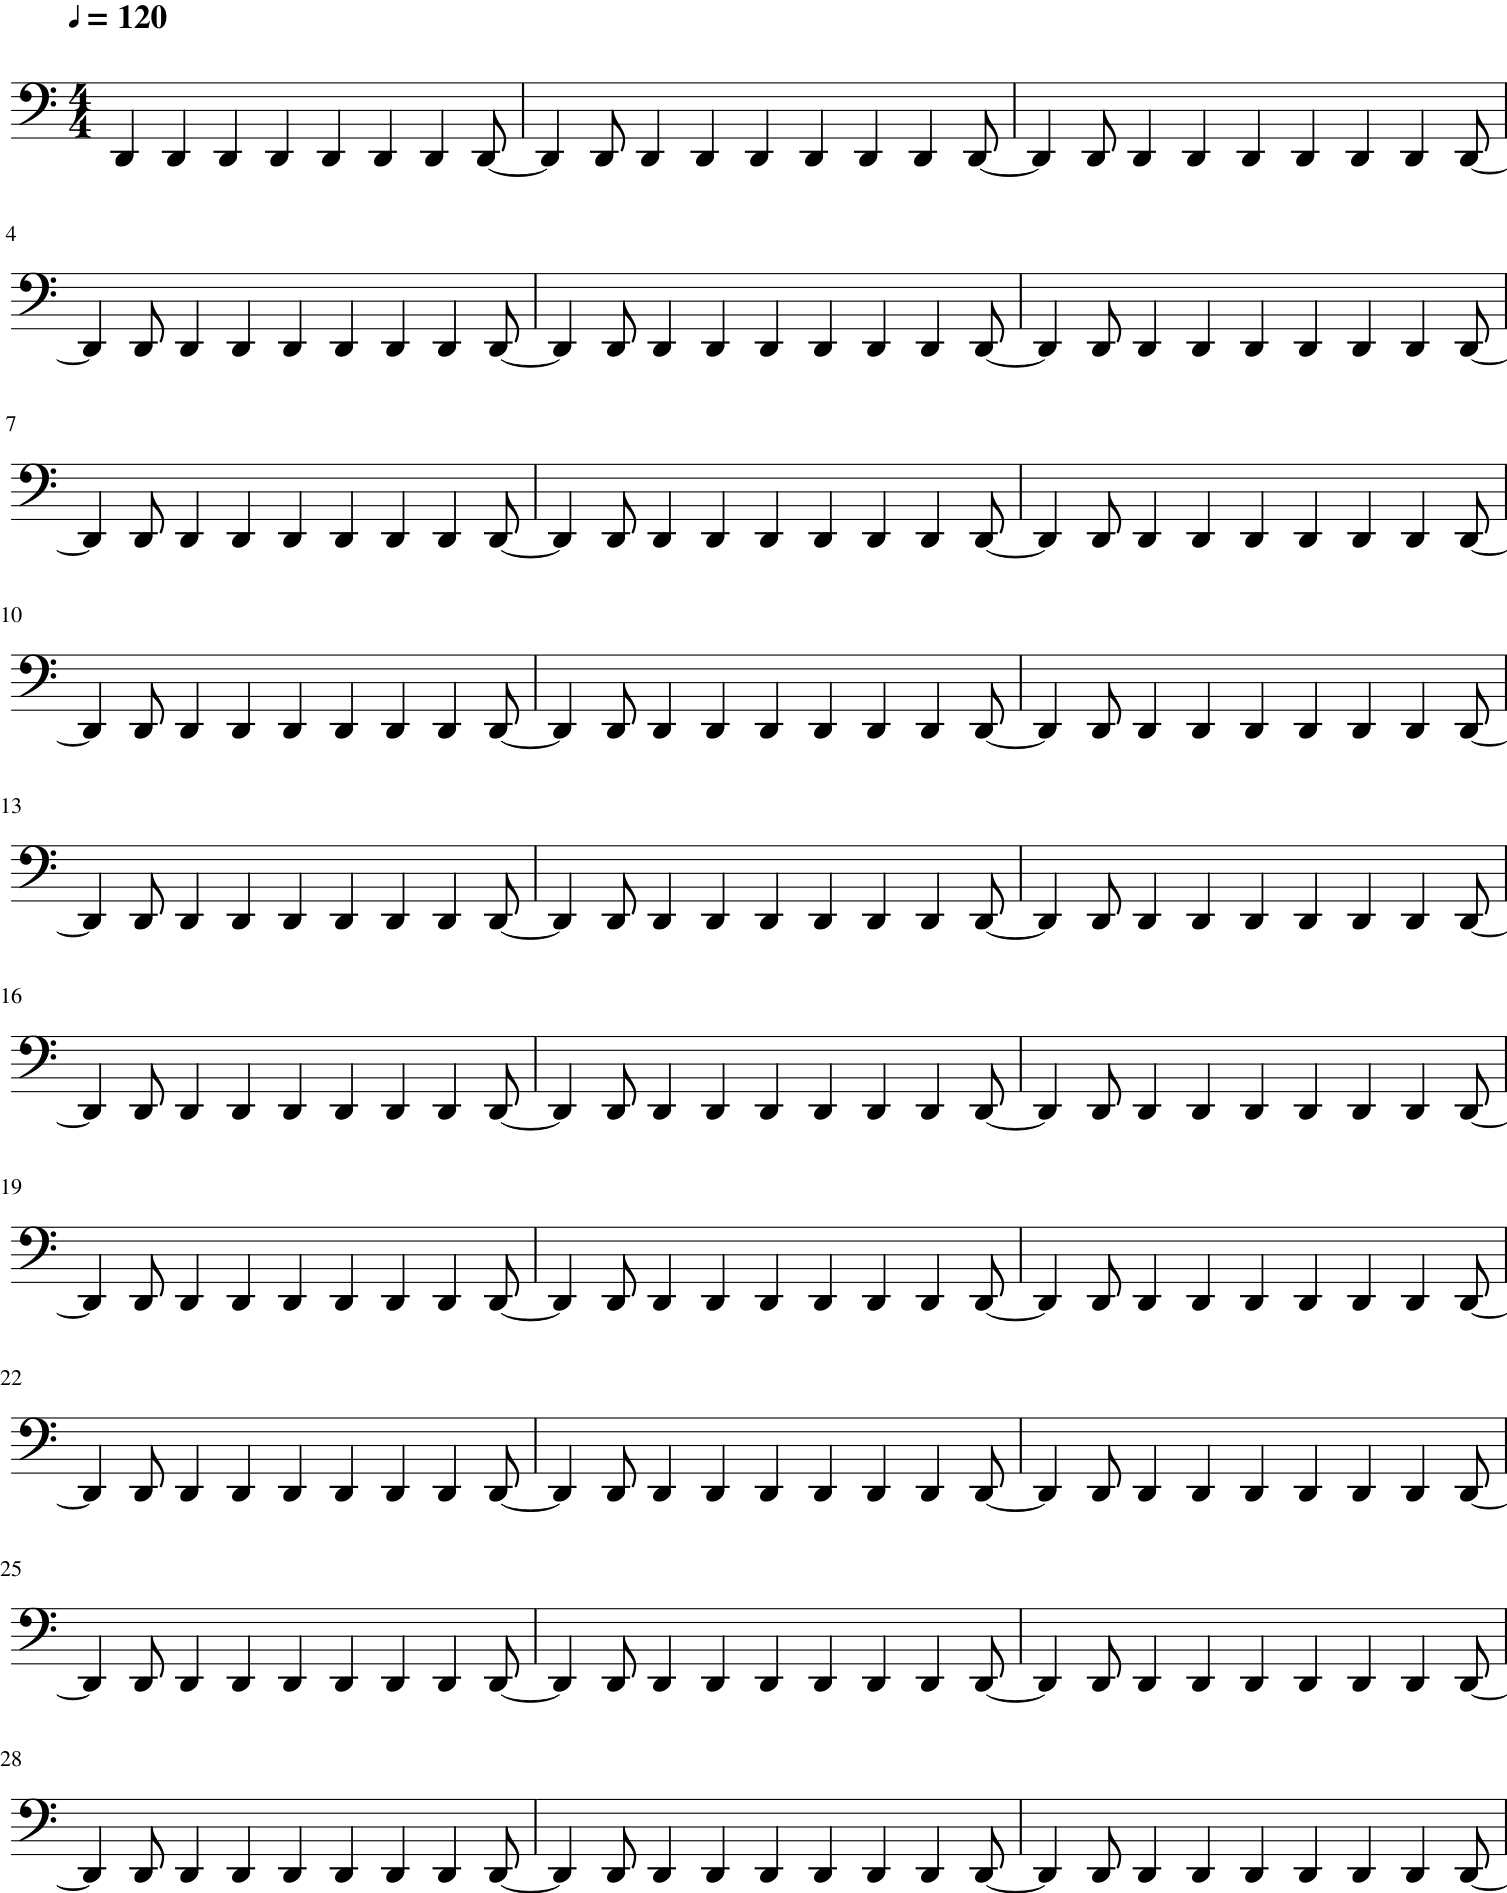

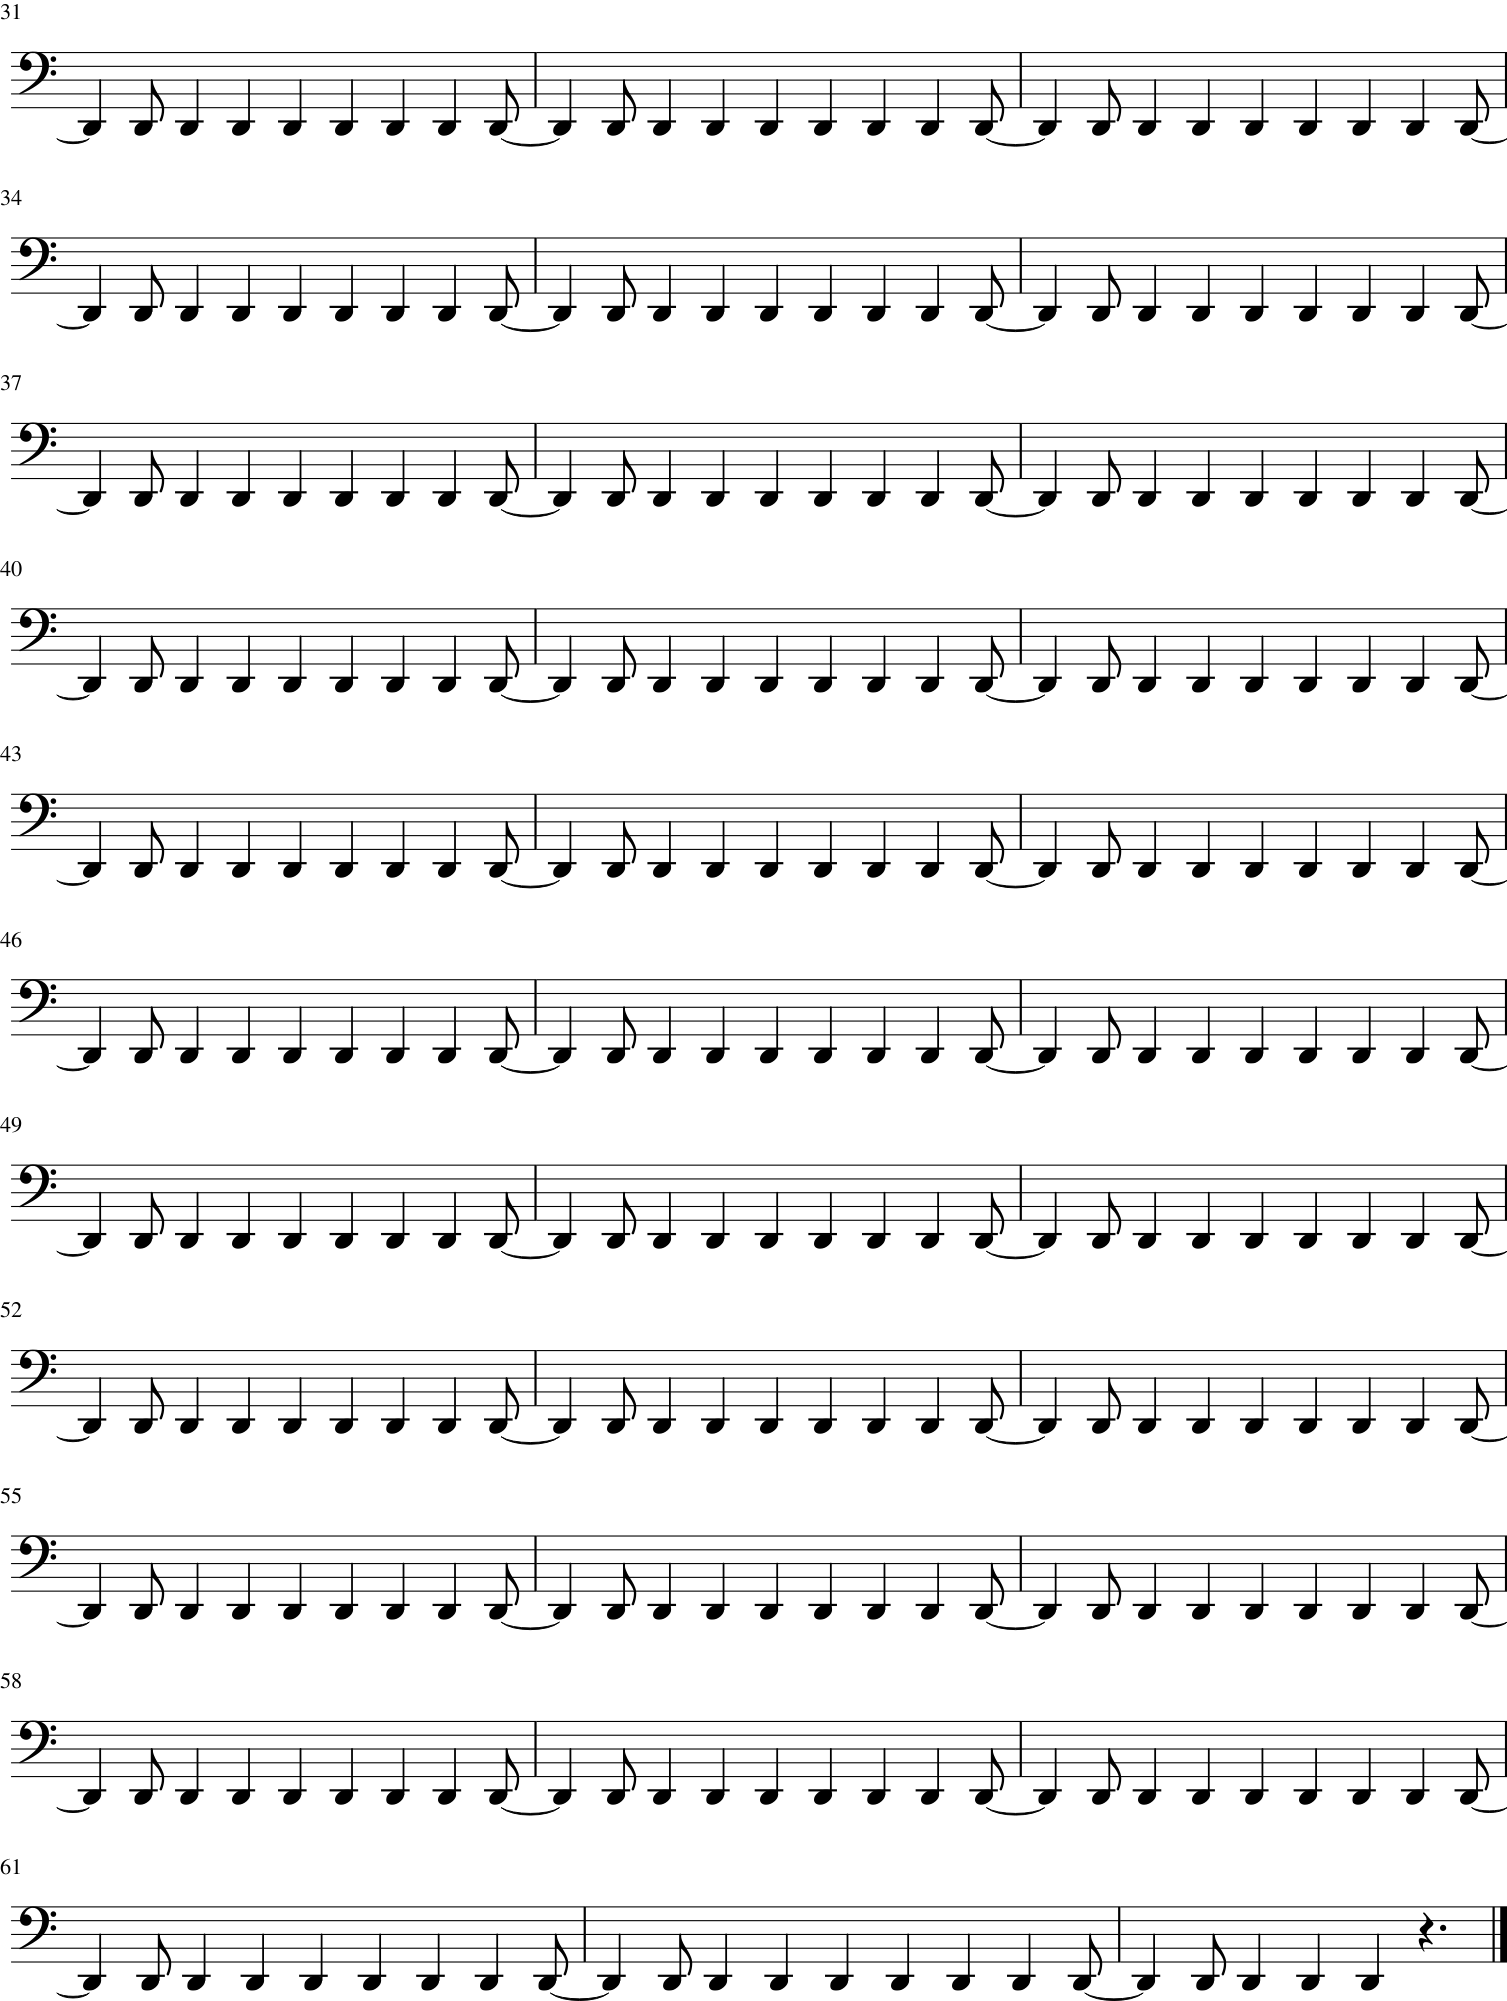

In [19]:
# translation of the file generated_music_output.mid  (that is generated using the LSTM network ) into musical notation

from music21 import environment, converter

# Set the MuseScore path in the Colab environment
musescore_path = '/usr/bin/mscore'

# Set the path in the music21 environment
environment.set('musescoreDirectPNGPath', musescore_path)

# Load the MIDI file
midi_stream = converter.parse('generated_music_output.mid')

# Show the musical notation representation
midi_stream.show()
